First model implemented using SVM model

In [1]:
from sklearnex.svm import SVC
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv(r'Hotel Reservations.csv')

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,customer_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Contract,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Transient,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Transient,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Transient,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Transient,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,customer_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Transient,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Transient,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Transient,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Transient,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Contract,0,0,0,161.67,0,Not_Canceled


In [6]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
customer_type                           0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

data['country'].fillna(data['country'].value_counts().index[0],inplace=True)
data['agent'].fillna(data['agent'].mean(),inplace=True)
data['company'].fillna(data['company'].mean(),inplace=True)

data.isnull().sum()

<AxesSubplot: xlabel='no_of_weekend_nights', ylabel='no_of_week_nights'>

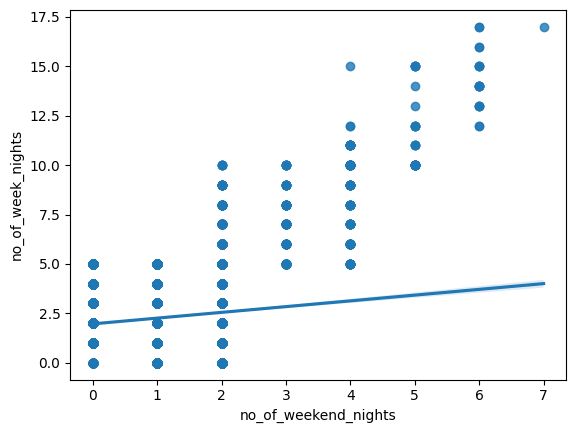

In [7]:
sns.regplot(x=data['no_of_weekend_nights'],y=data['no_of_week_nights'])

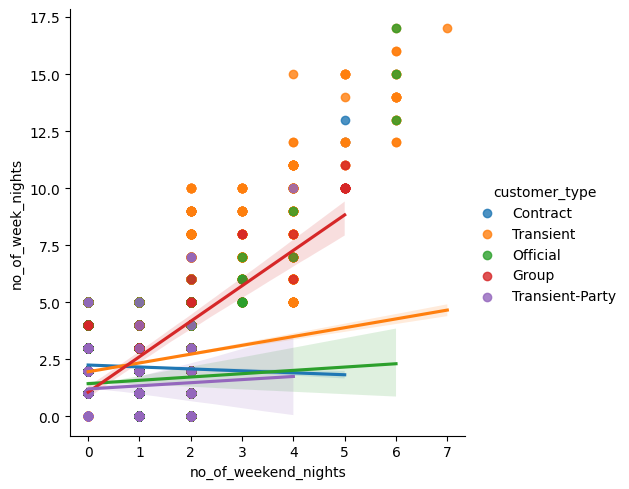

In [8]:
sns.lmplot(x='no_of_weekend_nights',y='no_of_week_nights',data=data,hue='customer_type')

In [9]:
data1=data.select_dtypes(exclude=[object])

In [10]:
data1.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


In [11]:
x=data1
y=data['customer_type']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [14]:
modelA=svm.SVC()
modelA.fit(x_train,y_train)
pr=modelA.predict(x_test)

In [15]:
print(classification_report(y_test,pr))

                 precision    recall  f1-score   support

       Contract       0.73      0.66      0.69      2091
          Group       1.00      0.04      0.07        28
       Official       0.79      0.40      0.53       386
      Transient       0.83      0.90      0.86      4670
Transient-Party       0.70      0.80      0.75        80

       accuracy                           0.80      7255
      macro avg       0.81      0.56      0.58      7255
   weighted avg       0.80      0.80      0.79      7255



In [16]:
confusion_matrix(y_test,pr)

array([[1375,    0,   17,  698,    1],
       [   3,    1,    5,   19,    0],
       [  83,    0,  154,  149,    0],
       [ 425,    0,   18, 4201,   26],
       [   2,    0,    2,   12,   64]])

In [17]:
print(accuracy_score(y_test,pr))

0.7987594762232942


Secondly using logistic regression to train the model

In [18]:
from sklearnex.linear_model import LogisticRegression
from sklearnex import patch_sklearn
patch_sklearn()

modelB = LogisticRegression(random_state=2)
# Calling the Logistic regression, this is optimized. 

modelB.fit(x_train,y_train)
# Training happens!

predicted_values = modelB.predict(x_test)
# Test, Predict. 

print(accuracy_score(y_test,pr))



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.7987594762232942


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thirdly using Naive bayes multinomiaNB

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Vectorize the data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

# Define the model
modelC = MultinomialNB()

# Train the model
modelC.fit(x_train, y_train)

# Predict on the test set
y_pred = modelC.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.39324603721571333


Fourthly using KNeighborsClassifier

In [20]:

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.neighbors import KNeighborsClassifier
modelD = KNeighborsClassifier()
modelD.fit(x_train, y_train)

predicted_values = modelD.predict(x_test)
# Test, Predict. 

print(accuracy_score(y_test,pr))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.7987594762232942


Fifthly using GradientBoostingClassifier

In [21]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import GradientBoostingClassifier
modelE = GradientBoostingClassifier()
modelE.fit(x_train, y_train)

predicted_values = modelE.predict(x_test)
# Test, Predict. 

print(accuracy_score(y_test,pr))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.7987594762232942


Sixthly using Naive bayes GaussianNB

In [22]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Vectorize the data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

# Define the model
modelF = GaussianNB()

# Train the model
modelF.fit(x_train, y_train)

# Predict on the test set
y_pred = modelF.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5765678842177808


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Seventhly using Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
modelG = DecisionTreeClassifier()
modelG.fit(x_train, y_train)

predicted_values = modelG.predict(x_test)
# Test, Predict. 

print(accuracy_score(y_test,pr))

0.7987594762232942


Comparing all the trained model to compare the efficiency

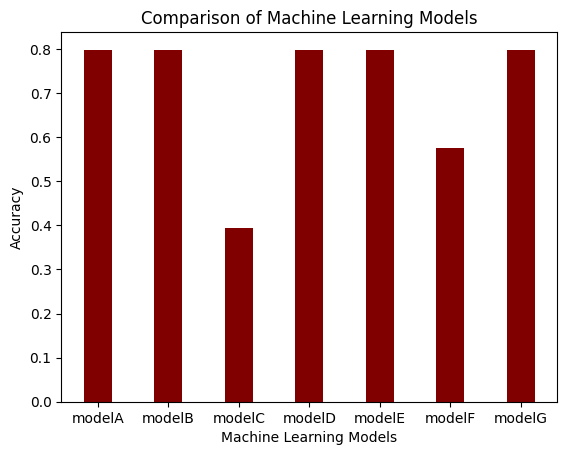

In [25]:
import matplotlib.pyplot as plt

models = ['modelA', 'modelB', 'modelC', 'modelD', 'modelE', 'modelF', 'modelG']
accuracy = [0.798, 0.798, 0.393, 0.798, 0.798, 0.576, 0.798]

plt.bar(models, accuracy, color ='maroon', width = 0.4)

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Machine Learning Models")

plt.show()


Here,

modelA = svm
--
modelB = LogisticRegression
--
modelC = MultinomialNB
--
modelD = KNeighborsClassifier
--
modelE = GradientBoostingClassifier
--
modelF = GaussianNB
--
modelG = DecisionTreeClassifier
--

Cross validating the accuracy of the models trained

In [28]:
from sklearn.model_selection import cross_val_score

# models is a list of different models that you want to compare
# X and y are the input features and target variable, respectively
# cv is the number of folds for cross-validation
models = [modelA, modelB, modelC, modelD, modelE, modelF, modelG]
X=data1
y=data['customer_type']
cv = 2

# Evaluate each model using cross-validation and accuracy metric
accuracy_scores = []
for model in models:
    accuracy_scores.append(cross_val_score(model, X, y, cv=cv, scoring='accuracy'))

# Print the mean and standard deviation of accuracy for each model
for i in range(len(models)):
    print(f"Model {i+1}: Accuracy = {accuracy_scores[i].mean():.4f} +/- {accuracy_scores[i].std():.4f}")


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Model 1: Accuracy = 0.6456 +/- 0.0057
Model 2: Accuracy = 0.6735 +/- 0.0108
Model 3: Accuracy = 0.4006 +/- 0.0082
Model 4: Accuracy = 0.8058 +/- 0.0140
Model 5: Accuracy = 0.8400 +/- 0.0174
Model 6: Accuracy = 0.5673 +/- 0.0280
Model 7: Accuracy = 0.8630 +/- 0.0157
